### In this assignment I have to find the frequency of words in a webpage. I will use urllib and BeautifulSoup to extract text from webpage.

### Importing Modules

In [1]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
from nltk.corpus import stopwords, webtext
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
response = urllib.request.urlopen('http://php.net/') #Requesting to http://php.net/
html = response.read() #Reads the response from http://php.net/
soup = BeautifulSoup(html,"html5lib") #Parses pages the same way a web browser does and Creates valid HTML5

### Data Exploration

In [3]:
#Prints the type of response variable
print(type(response))

<class 'http.client.HTTPResponse'>


In [4]:
#Prints the type of html variable
print(type(html))

<class 'bytes'>


In [5]:
#Prints the type of soup variable
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [6]:
#Prints html data i.e. response read from http://php.net
print(html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="http://php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="http://php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="http://php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="http://php.net/index.php">\n <link rel="shorturl" href="http://php.net/index">\n <link rel="alternate" href="http://php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen">\n<link rel="styles

In [7]:
#Prints soup data, its BeautifulSoup object which represents the document as a nested data structure
print(soup)

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><head>

  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>

  <title>PHP: Hypertext Preprocessor</title>

 <link href="http://php.net/favicon.ico" rel="shortcut icon"/>
 <link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>
 <link href="http://php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>
 <link href="http://php.net/feed.atom" rel="alternate" title="PHP: Hypertext Preprocessor" type="application/atom+xml"/>

 <link href="http://php.net/index.php" rel="canonical"/>
 <link href="http://php.net/index" rel="shorturl"/>
 <link href="http://php.net/index" hreflang="x-default" rel="alternate"/>



<link href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="/cached.php?t=15397

In [8]:
#The BeautifulSoup object itself represents the document as a whole. 
soup.name

'[document]'

In [9]:
#Shows the data in head html tag
soup.head

<head>

  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>

  <title>PHP: Hypertext Preprocessor</title>

 <link href="http://php.net/favicon.ico" rel="shortcut icon"/>
 <link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>
 <link href="http://php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>
 <link href="http://php.net/feed.atom" rel="alternate" title="PHP: Hypertext Preprocessor" type="application/atom+xml"/>

 <link href="http://php.net/index.php" rel="canonical"/>
 <link href="http://php.net/index" rel="shorturl"/>
 <link href="http://php.net/index" hreflang="x-default" rel="alternate"/>



<link href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="/cached.php?t=1539765004&amp;f=/fonts/Font-Awesome/css/fontello.css" media="screen" rel=

In [10]:
#Shows the title tag data
soup.title

<title>PHP: Hypertext Preprocessor</title>

In [11]:
#Shows the first <b> tag beneath the <body> tag
soup.body.b

<b>THIS IS A DEVELOPMENT PREVIEW - DO NOT USE IT IN PRODUCTION!</b>

In [12]:
#Shows the first tag by 'a' name 
soup.a

<a class="brand" href="/"><img alt="php" height="24" src="/images/logos/php-logo.svg" width="48"/></a>

In [13]:
#Shows all the a tag
soup.find_all('a')

[<a class="brand" href="/"><img alt="php" height="24" src="/images/logos/php-logo.svg" width="48"/></a>,
 <a href="/downloads">Downloads</a>,
 <a href="/docs.php">Documentation</a>,
 <a href="/get-involved">Get Involved</a>,
 <a href="/support">Help</a>,
 <a href="/manual/en/getting-started.php">Getting Started</a>,
 <a href="/manual/en/introduction.php">Introduction</a>,
 <a href="/manual/en/tutorial.php">A simple tutorial</a>,
 <a href="/manual/en/langref.php">Language Reference</a>,
 <a href="/manual/en/language.basic-syntax.php">Basic syntax</a>,
 <a href="/manual/en/language.types.php">Types</a>,
 <a href="/manual/en/language.variables.php">Variables</a>,
 <a href="/manual/en/language.constants.php">Constants</a>,
 <a href="/manual/en/language.expressions.php">Expressions</a>,
 <a href="/manual/en/language.operators.php">Operators</a>,
 <a href="/manual/en/language.control-structures.php">Control Structures</a>,
 <a href="/manual/en/language.functions.php">Functions</a>,
 <a href=

In [14]:
#Prints all extracted text from the page
print(soup.get_text())



  
  

  PHP: Hypertext Preprocessor

 
 
 
 

 
 
 









 

 

 

 

 





  
    
    
    
    
      Downloads
      Documentation
      Get Involved
      Help
    
    
      
      
    
  
  


Getting Started
	Introduction
	A simple tutorial
Language Reference
	Basic syntax
	Types
	Variables
	Constants
	Expressions
	Operators
	Control Structures
	Functions
	Classes and Objects
	Namespaces
	Errors
	Exceptions
	Generators
	References Explained
	Predefined Variables
	Predefined Exceptions
	Predefined Interfaces and Classes
	Context options and parameters
	Supported Protocols and Wrappers


Security
	Introduction
	General considerations
	Installed as CGI binary
	Installed as an Apache module
	Session Security
	Filesystem Security
	Database Security
	Error Reporting
	Using Register Globals
	User Submitted Data
	Magic Quotes
	Hiding PHP
	Keeping Current
Features
	HTTP authentication with PHP
	Cookies
	Sessions
	Dealing with XForms
	Handling file uploads
	Using remote files
	C

### Counting the words

In [15]:
#Extracting all text from the page.
texts = soup.get_text(strip=True)

#Creating a list of the words extracted from the page
tokens = [txt for txt in texts.split()]

#Count the number of times that each a word occurs and stores in a dictionary where word is the key and count is value.
counts = nltk.FreqDist(tokens)

#Printing all the words and occurance of the word.
for key,value in counts.items(): 
    print(key + ' --> ' + str(value))

PHP: --> 1
Hypertext --> 1
PreprocessorDownloadsDocumentationGet --> 1
InvolvedHelpGetting --> 1
StartedIntroductionA --> 1
simple --> 1
tutorialLanguage --> 1
ReferenceBasic --> 1
syntaxTypesVariablesConstantsExpressionsOperatorsControl --> 1
StructuresFunctionsClasses --> 1
and --> 74
ObjectsNamespacesErrorsExceptionsGeneratorsReferences --> 1
ExplainedPredefined --> 1
VariablesPredefined --> 1
ExceptionsPredefined --> 1
Interfaces --> 1
ClassesContext --> 1
options --> 1
parametersSupported --> 1
Protocols --> 1
WrappersSecurityIntroductionGeneral --> 1
considerationsInstalled --> 1
as --> 2
CGI --> 1
binaryInstalled --> 1
an --> 2
Apache --> 1
moduleSession --> 1
SecurityFilesystem --> 1
SecurityDatabase --> 1
SecurityError --> 1
ReportingUsing --> 1
Register --> 1
GlobalsUser --> 1
Submitted --> 1
DataMagic --> 1
QuotesHiding --> 1
PHPKeeping --> 1
CurrentFeaturesHTTP --> 1
authentication --> 1
with --> 3
PHPCookiesSessionsDealing --> 1
XFormsHandling --> 1
file --> 1
uploadsUsing

### Removing the Stopwords

In [16]:
import nltk
nltk.download('stopwords')
    
#Creating a list of the english stopwords
sw = stopwords.words('english')

#List of new tokens without stopwords
tokens_new = [tkn for tkn in tokens if tkn not in sw]

#Count the number of times that each a word occurs and stores in a dictionary where word is the key and count is value.
counts_new = nltk.FreqDist(tokens_new)

#Printing all the words and occurance of the word.
for key,value in counts_new.items(): 
    print(key + ' --> ' + str(value))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nutan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
PHP: --> 1
Hypertext --> 1
PreprocessorDownloadsDocumentationGet --> 1
InvolvedHelpGetting --> 1
StartedIntroductionA --> 1
simple --> 1
tutorialLanguage --> 1
ReferenceBasic --> 1
syntaxTypesVariablesConstantsExpressionsOperatorsControl --> 1
StructuresFunctionsClasses --> 1
ObjectsNamespacesErrorsExceptionsGeneratorsReferences --> 1
ExplainedPredefined --> 1
VariablesPredefined --> 1
ExceptionsPredefined --> 1
Interfaces --> 1
ClassesContext --> 1
options --> 1
parametersSupported --> 1
Protocols --> 1
WrappersSecurityIntroductionGeneral --> 1
considerationsInstalled --> 1
CGI --> 1
binaryInstalled --> 1
Apache --> 1
moduleSession --> 1
SecurityFilesystem --> 1
SecurityDatabase --> 1
SecurityError --> 1
ReportingUsing --> 1
Register --> 1
GlobalsUser --> 1
Submitted --> 1
DataMagic --> 1
QuotesHiding --> 1
PHPKeeping --> 1
Cur

### Count Plot

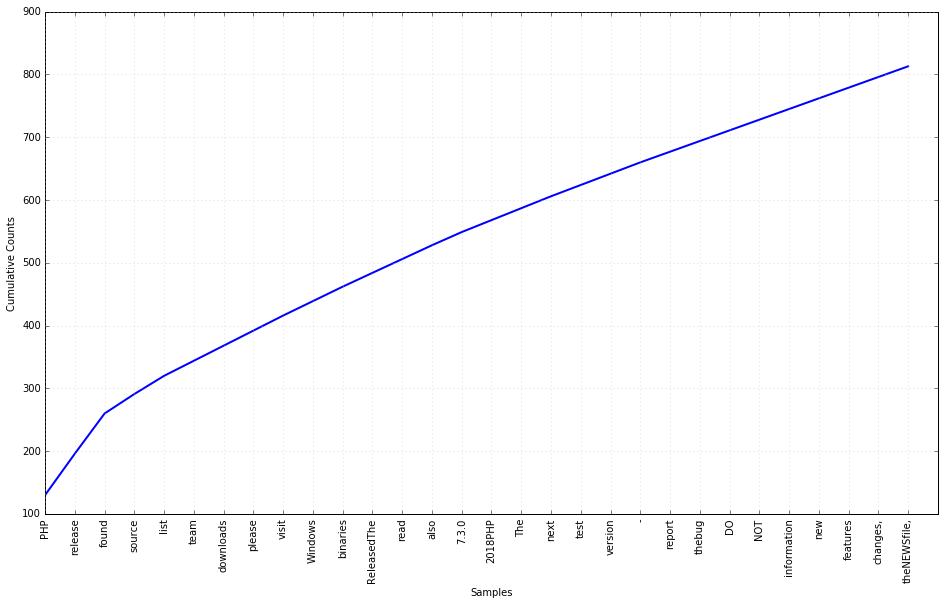

In [17]:
#Plots the cumulative counts of the 30 most commonly occuring words.
plt.figure(figsize=(16,9))
counts_new.plot(30, cumulative=True)

### Dispersion Plot

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\Nutan\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


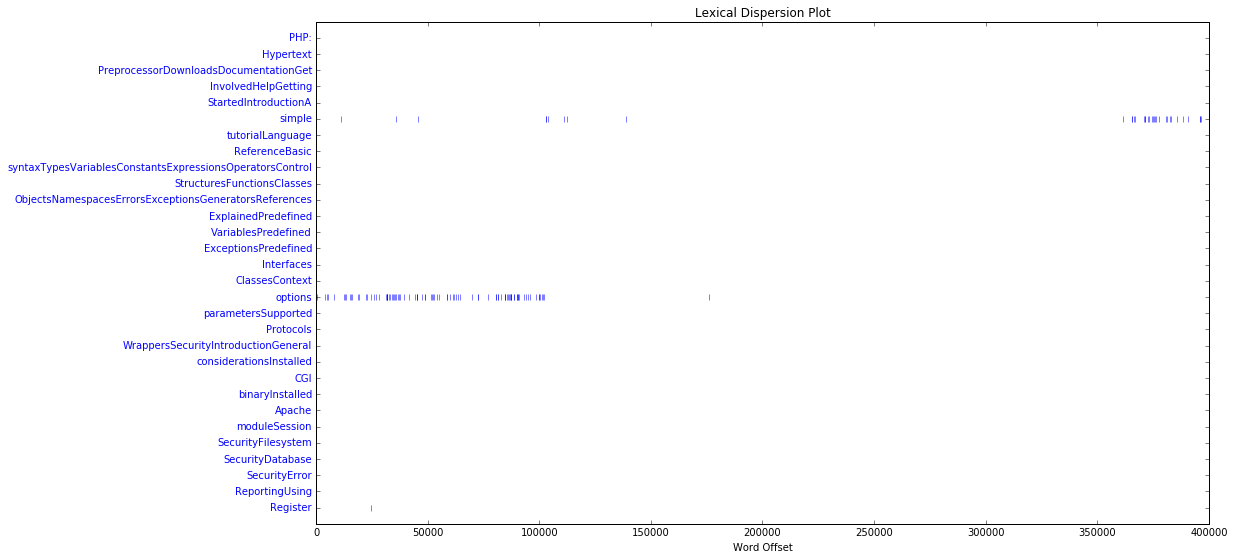

In [18]:
import nltk
nltk.download('webtext')
#Dispersion plot of first 30 words with respect to webtext words
plt.figure(figsize=(16,9))
webtext = nltk.text.Text(nltk.corpus.webtext.words())
webtext.dispersion_plot(tokens_new[:30])